In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [5]:
change_age_range_survival_ratio = []

for i in range(1, 80):
    change_age_range_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

In [6]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [7]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자기 자신
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자기 자신

In [8]:
df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i>0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i : np.log(i) if i>0 else 0)

In [9]:
df_train['Initial'] = df_train['Name'].str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test['Name'].str.extract('([A-Za-z]+)\.')

In [10]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                            ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'],inplace=True)
df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                            ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'],inplace=True)

In [11]:
df_all = pd.concat([df_train, df_test])

In [12]:
df_all.reset_index(drop=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,2.085672,NaN,S,1,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,4.690430,C105,C,1,Mr
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,1.981001,NaN,S,1,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,2.085672,NaN,S,1,Mr


In [13]:
df_all.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,658.852459,0.575000,2.655738,5.482642,2.049180,1.377049,3.262225,4.426230
Miss,616.992453,0.704301,2.332075,21.834533,0.652830,0.494340,3.065227,2.147170
Mr,658.831388,0.162571,2.359274,32.556397,0.286641,0.159533,2.676067,1.446174
Mrs,685.673367,0.795276,1.929648,37.034884,0.658291,0.824121,3.488188,2.482412
Other,714.923077,0.111111,1.615385,44.923077,0.230769,0.153846,2.951897,1.384615


In [14]:
df_train.loc[df_train['Survived'] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,2.409941,NaN,S,3,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,3.403555,NaN,C,2,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,1.977547,NaN,C,1,Miss
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,4.420746,C50,C,2,Mrs
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,3.258097,NaN,S,2,Mrs
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,3.401197,B42,S,1,Miss


In [15]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mr'), 'Age'] = 30
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mrs'), 'Age'] = 37
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Master'), 'Age'] = 5
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Miss'), 'Age'] = 22
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Other'), 'Age'] = 45

df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Mr'), 'Age'] = 30
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Mrs'), 'Age'] = 37
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Master'), 'Age'] = 5
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Miss'), 'Age'] = 22
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Other'), 'Age'] = 45

In [16]:
df_train.loc[(df_train['Initial'] == 'Mr'), 'Age']

0      22.0
4      35.0
5      30.0
6      54.0
12     20.0
       ... 
881    33.0
883    28.0
884    25.0
889    26.0
890    32.0
Name: Age, Length: 529, dtype: float64

In [17]:
df_train['Embarked'].fillna('S', inplace=True)

In [18]:
df_train['Embarked'].isnull().sum()

0

In [19]:
df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

In [20]:
df_test['Age_cat'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7

In [21]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7 

In [22]:
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

In [23]:
(df_train['Age_cat'] == df_train['Age_cat_2']).all()

True

In [24]:
df_train.drop(['Age', 'Age_cat_2'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

In [25]:
df_train.Initial.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [26]:
df_train['Initial'] = df_train['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})
df_test['Initial'] = df_test['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})

In [27]:
df_train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [28]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0,'Q':1,'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0,'Q':1,'S':2})

In [29]:
df_train['Sex'] = df_train['Sex'].map({'female':0,'male':1})
df_test['Sex'] = df_test['Sex'].map({'female':0,'male':1})

In [30]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [31]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix = 'Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix = 'Embarked')

In [32]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket','Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket','Cabin'], axis=1, inplace=True)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [34]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [35]:
X_tr, X_vid, y_tr, y_vid = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

In [36]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)

RandomForestClassifier()

In [37]:
prediction = model.predict(X_vid)

In [38]:
print('총 {}명 중 {:2f}% 정확도로 생존 맞춤'.format(y_vid.shape[0], 100 * metrics.accuracy_score(prediction, y_vid)))

총 268명 중 82.462687% 정확도로 생존 맞춤


In [39]:
(prediction == y_vid).sum() / prediction.shape[0]

0.8246268656716418

In [40]:
model.feature_importances_

array([0.09804917, 0.11024793, 0.32692013, 0.09903017, 0.11821897,
       0.01154784, 0.03523355, 0.12984508, 0.01969754, 0.00515483,
       0.01535399, 0.01285372, 0.01784709])

In [41]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [42]:
from pandas import Series

In [43]:
feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

In [44]:
Series_feat_imp

Pclass        0.098049
Sex           0.110248
Fare          0.326920
FamilySize    0.099030
Age_cat       0.118219
Initial_0     0.011548
Initial_1     0.035234
Initial_2     0.129845
Initial_3     0.019698
Initial_4     0.005155
Embarked_0    0.015354
Embarked_1    0.012854
Embarked_2    0.017847
dtype: float64

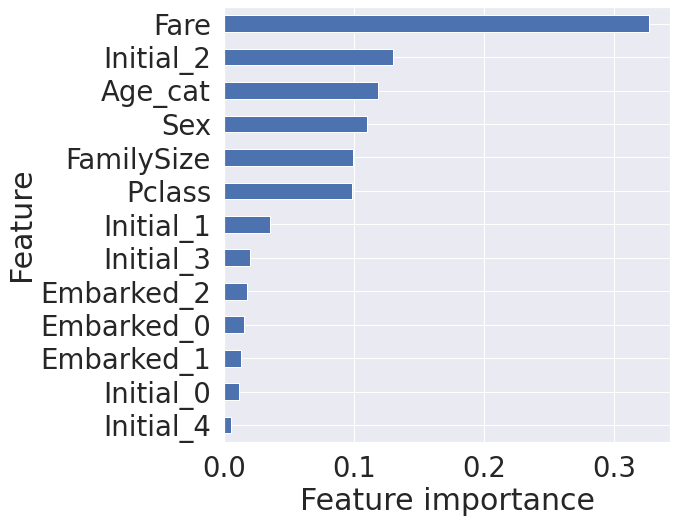

In [45]:
plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [46]:
submission = pd.read_csv('../input/titanic/gender_submission.csv')

In [47]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [48]:
prediction = model.predict(X_test)

In [49]:
submission['Survived'] = prediction

In [50]:
submission.to_csv('./my_first_submission.csv', index=False)